## Semana 7: Data Analysis with Python (IBM)

## Profesor : Jobish Vallikavungal Devassia

## Materia   : Ciencia y analítica de datos

### Kevin Alejandro Garcia Escalante                                    A01376680


### Fecha : 1 de Noviembre de 2022 

## Lab 4

## Question #1 a): Create a linear regression object called "lm1".

In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [13]:
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [16]:
lm1 = LinearRegression()
lm

LinearRegression()

## Question #1 b): 
Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [17]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

## Question #1 c):
Find the slope and intercept of the model.

In [18]:
lm1.coef_

array([[166.86001569]])

In [19]:
lm1.intercept_

array([-7963.33890628])

## Question #1 d): ¶
What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [23]:
X = df[['highway-mpg']]
Y = df['price']

In [24]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

## Question #2 a): 
Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [25]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])


LinearRegression()

## Question #2 b): ¶
Find the coefficient of the model.

In [26]:
lm2.coef_

array([   1.49789586, -820.45434016])

## Question #3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [27]:
import seaborn as sns

In [28]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


## Question #4:
Create 11 order polynomial model with the variables x and y from above.

In [32]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [33]:
x = df['highway-mpg']
y = df['price']

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


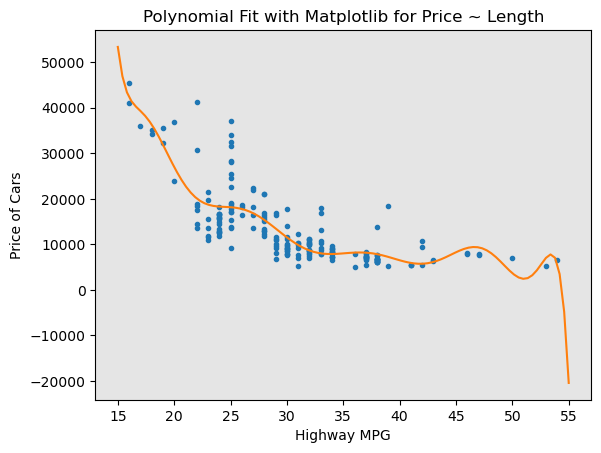

In [34]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

## Question #5:
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [40]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# Graded Review Questions

* Q1 Let X be a dataframe with 100 rows and 5 columns. Let y be the target with 100 samples. Assuming all the relevant libraries and data have been imported, the following line of code has been executed:

LR = LinearRegression()

LR.fit(X, y)

yhat = LR.predict(X)

How many samples does yhat contain?

RESP : 100

* Q2 What value of R^2 (coefficient of determination) indicates your model performs best?

RESP : 1

* Q3 Which statement is true about polynomial linear regression?

* Q4 The larger the mean squared error, the better your model performs:

RESP : False

* Q5 Assume all the libraries are imported. y is the target and X is the features or dependent variables. Consider the following lines of code:

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(X,y)

ypipe=pipe.predict(X)

What is the result of ypipe?

RESP : Standardize the data, then perform prediction using a linear regression model.